In [21]:
# zad 17.03

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = "svg"

from IPython.display import display, Math, Latex, Markdown


# funkcje
def h(theta, x):
    return theta[0] + theta[1] * x


def J(h, theta, x, y):
    """Funkcja kosztu"""
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i])**2 for i in range(m))


def LatexMatrix(matrix):
    ltx = r'\left[\begin{array}'
    m, n = matrix.shape
    ltx += '{' + ("r" * n) + '}'
    for i in range(m):
        ltx += r" & ".join([('%.4f' % j.item()) for j in matrix[i]]) + r" \\ "
    ltx += r'\end{array}\right]'
    return ltx


def gradient_descent(h, cost_fun, theta, x, y, alpha, eps, check_step):
    current_cost = cost_fun(h, theta, x, y)
    log = [[current_cost, theta]]  # log przechowuje wartości kosztu i parametrów
    m = len(y)
    while True:
        new_theta = [
            theta[0] - alpha/float(m) * sum(h(theta, x[i]) - y[i]
                                            for i in range(m)),   
            theta[1] - alpha/float(m) * sum((h(theta, x[i]) - y[i]) * x[i]
                                            for i in range(m))]
        theta = new_theta  # jednoczesna aktualizacja - używamy zmiennej tymczasowej
        prev_cost = current_cost
        current_cost = cost_fun(h, theta, x, y)
        if check_step:
            if current_cost > prev_cost:
                print("Zbyt duża długość kroku!")
                break
        if abs(prev_cost - current_cost) <= eps:
            break     
        log.append([current_cost, theta])
    return theta, log


# wykonanie
## wczytanie danych
data = pd.read_csv("fires_thefts.csv", names=['fires', 'thefts'])
x_fires = data["fires"].tolist() # albo - .to_numpy().flatten()
y_thefts = data["thefts"].tolist()

## wytrenowanie modelu za pomoca iteracyjnego gradientu prostego
best_theta, log = gradient_descent(h, J, [0.0, 0.0], x_fires, y_thefts, alpha=0.001, eps=0.0000001, check_step=True)

display(Math(r'\large\textrm{Wynik:}\quad \theta = ' + 
             LatexMatrix(np.matrix(best_theta).reshape(2,1)) + 
            (r' \quad J(\theta) = %.4f' % log[-1][0])  
            + r' \quad \textrm{po %d iteracjach}' % len(log))) 


#predykcja
example_fires = [50, 100, 200]
for example in example_fires: display(Markdown(rf'### Przewidywana ilosc kradziezy dla ${example}$ pozarow: ${h(best_theta, example)}$')) # markdown swiat dominacja


<IPython.core.display.Math object>

### Przewidywana ilosc kradziezy dla $50$ pozarow: $82.70999487819813$

### Przewidywana ilosc kradziezy dla $100$ pozarow: $148.45251499453076$

### Przewidywana ilosc kradziezy dla $200$ pozarow: $279.93755522719596$

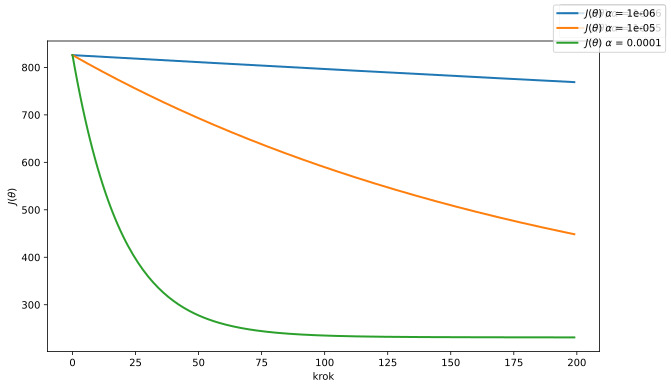

In [40]:
# zad 4.2

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = "svg"

from IPython.display import display, Math, Latex, Markdown
def costchangeplot(logs):
#     fig = plt.figure(figsize=(16*.6, 9*.6))
#     ax = fig.add_subplot(111)
#     fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
#     ax.set_xlabel('krok')
#     ax.set_ylabel(r'$J(\theta)$')

    X = np.arange(0, 200, 1)
    Y = [logs[step][0] for step in X]
#     ax.plot(X, Y, linewidth='2', label=(r'$J(\theta)$'))
#     return fig
    return X, Y

def slide7(alpha):
    best_theta, log = gradient_descent(h, J, [0.0, 0.0], x_fires, y_thefts, alpha=alpha, eps=0.0001, check_step=True)
    X, Y = costchangeplot(log)
    ax.plot(X, Y, linewidth='2', label=(fr'$J(\theta)$ $\alpha$ = {alpha}'))
    fig.legend()

# sliderAlpha1 = widgets.FloatSlider(min=0.000001, max=0.001, step=0.001, value=0.0001, description=r'$\alpha$', width=300)

#  trzeba wczensniej wlaczyc poprzednie zadanie
alphas = [0.000001, 0.00001, 0.0001]
fig = plt.figure(figsize=(16*.6, 9*.6))
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
ax.set_xlabel('krok')
ax.set_ylabel(r'$J(\theta)$')
for alpha in alphas:
    slide7(alpha)
# results = []
# for alpha in alphas:
#     best_theta, log = gradient_descent(h, J, [0.0, 0.0], x_fires, y_thefts, alpha=alpha, eps=0.0000001, check_step=True)    
#     results.append(log)
#     display(Math(r'\large\textrm{Wynik:}\quad \theta = ' + 
#                  LatexMatrix(np.matrix(best_theta).reshape(2,1)) + 
#                 (r' \quad J(\theta) = %.4f' % log[-1][0])  
#                 + r' \quad \textrm{po %d iteracjach}' % len(log))) 

# print(results[0][:200][0])


In [44]:
def mse(expected, predicted):
    """Błąd średniokwadratowy"""
    m = len(expected)
    if len(predicted) != m:
        raise Exception('Wektory mają różne długości!')
    return 1.0 / (2 * m) * sum((expected[i] - predicted[i])**2 for i in range(m))

data = pd.read_csv("fires_thefts.csv", names=['fires', 'thefts'])
x_fires = data["fires"].tolist() # albo - .to_numpy().flatten()
y_thefts = data["thefts"].tolist()
print(data)
np.array_split(data, 2)



    fires  thefts
0     6.2      29
1     9.5      44
2    10.5      36
3     7.7      37
4     8.6      53
5    34.1      68
6    11.0      75
7     6.9      18
8     7.3      31
9    15.1      25
10   29.1      34
11    2.2      14
12    5.7      11
13    2.0      11
14    2.5      22
15    4.0      16
16    5.4      27
17    2.2       9
18    7.2      29
19   15.1      30
20   16.5      40
21   18.4      32
22   36.2      41
23   39.7     147
24   18.5      22
25   23.3      29
26   12.2      46
27    5.6      23
28   21.8       4
29   21.6      31
30    9.0      39
31    3.6      15
32    5.0      32
33   28.6      27
34   17.4      32
35   11.3      34
36    3.4      17
37   11.9      46
38   10.5      42
39   10.7      43
40   10.8      34
41    4.8      19


[    fires  thefts
 0     6.2      29
 1     9.5      44
 2    10.5      36
 3     7.7      37
 4     8.6      53
 5    34.1      68
 6    11.0      75
 7     6.9      18
 8     7.3      31
 9    15.1      25
 10   29.1      34
 11    2.2      14
 12    5.7      11
 13    2.0      11
 14    2.5      22
 15    4.0      16
 16    5.4      27
 17    2.2       9
 18    7.2      29
 19   15.1      30
 20   16.5      40,
     fires  thefts
 21   18.4      32
 22   36.2      41
 23   39.7     147
 24   18.5      22
 25   23.3      29
 26   12.2      46
 27    5.6      23
 28   21.8       4
 29   21.6      31
 30    9.0      39
 31    3.6      15
 32    5.0      32
 33   28.6      27
 34   17.4      32
 35   11.3      34
 36    3.4      17
 37   11.9      46
 38   10.5      42
 39   10.7      43
 40   10.8      34
 41    4.8      19]